In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
full_data = pd.read_csv("vgsales.csv") #getting full data from kaggle csv
full_data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [3]:
print(full_data['Year'].min(),full_data['Year'].max())
print(full_data['Global_Sales'].min(),full_data['Global_Sales'].max())

1980.0 2020.0
0.01 82.74


In [16]:
test = full_data[full_data['NA_Sales']==0.51] #visual example for why data must be aggregate grouped by domestic sales columns
test.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
700,702,Mario Bros.,NES,1983.0,Platform,Nintendo,0.51,0.12,1.63,0.02,2.28
719,721,Dissidia: Final Fantasy,PSP,2008.0,Fighting,Square Enix,0.51,0.51,0.91,0.32,2.25
1314,1316,LEGO City Undercover,3DS,2013.0,Platform,Nintendo,0.51,0.75,0.07,0.12,1.46
1397,1399,WWE '13,PS3,2012.0,Action,THQ,0.51,0.62,0.00,0.26,1.39
1481,1483,Pokemon Ranger: Guardian Signs,DS,2010.0,Role-Playing,Nintendo,0.51,0.17,0.58,0.06,1.33
1736,1738,Mirror's Edge,X360,2008.0,Platform,Electronic Arts,0.51,0.51,0.01,0.13,1.17
1760,1762,Plants vs. Zombies: Garden Warfare,X360,2014.0,Shooter,Electronic Arts,0.51,0.54,0.00,0.10,1.16
1770,1772,Qix,GB,1990.0,Puzzle,Nintendo,0.51,0.20,0.41,0.03,1.15
1846,1848,Toy Story 3: The Video Game,PS3,2010.0,Action,Disney Interactive Studios,0.51,0.42,0.00,0.17,1.11
1861,1863,Popeye,NES,1983.0,Platform,Nintendo,0.51,0.12,0.45,0.02,1.10


In [4]:
na_data = pd.concat([full_data['NA_Sales'],full_data['Global_Sales']], axis=1) #creating aggregate grouped data sets for each locale
na_data = na_data.sort_values('NA_Sales')
na_data = na_data.loc[na_data['NA_Sales'] > 0]
na_grouped_data = na_data.groupby("NA_Sales").mean()

eu_data = pd.concat([full_data['EU_Sales'],full_data['Global_Sales']], axis=1)
eu_data = eu_data.sort_values('EU_Sales')
eu_data = eu_data.loc[eu_data['EU_Sales'] > 0]
eu_grouped_data = eu_data.groupby("EU_Sales").mean()

jp_data = pd.concat([full_data['JP_Sales'],full_data['Global_Sales']], axis=1)
jp_data = jp_data.sort_values('JP_Sales')
jp_data = jp_data.loc[jp_data['JP_Sales'] > 0]
jp_grouped_data = jp_data.groupby("JP_Sales").mean()

In [10]:
#function for getting legrange polynomial function
#takes x values and y values from points as inputs
#returns interpolating polynomial function
def getLegrangePolynomial(x_vals, y_vals):
    
    def getLB(x,i): #gets lagrange basis for ith data point
        #print("GETTING BASIS", i)
        numerator = 1
        denominator = 1
        for a in range(len(x_vals)):
            if a != i:
                numerator *= (x-x_vals[a])
                denominator *= (x_vals[i]-x_vals[a])
        return numerator/denominator
    
    def legrangeFunction(x): #creating the actual function to be returned
        value = 0
        for b in range(len(x_vals)):
            addition = getLB(x,b) * y_vals[b]
            #print("ADDITION FOR BASIS",b, addition)
            value += addition
        return value
    
    return legrangeFunction

#helper function to get only legrange value and not function
#used in testing to make sure returned polynomial from above function is outputting correct values
def getLegrangeValue(x, x_vals, y_vals):
    def getLB(i):
        numerator = 1
        denominator = 1
        for a in range(len(x_vals)):
            if a != i:
                numerator *= (x-x_vals[a])
                denominator *= (x_vals[i]-x_vals[a])
        return numerator/denominator
    
    value = 0
    for b in range(len(x_vals)):
        addition = getLB(b) * y_vals[b]
        #print("ADDITION FOR BASIS",b, addition)
        value += addition
    return value

In [11]:
#create our lagrange interpolating polynomials
na_function = getLegrangePolynomial(na_grouped_data.index.tolist(), na_grouped_data['Global_Sales'].tolist()) 
eu_function = getLegrangePolynomial(eu_grouped_data.index.tolist(), eu_grouped_data['Global_Sales'].tolist())
jp_function = getLegrangePolynomial(jp_grouped_data.index.tolist(), jp_grouped_data['Global_Sales'].tolist())

Text(0.5, 1.0, 'JP Sales vs Global Sales')

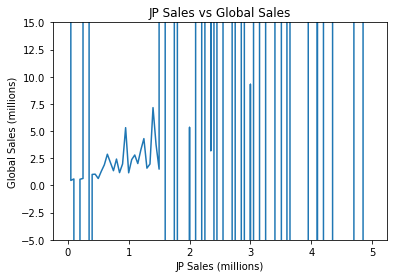

In [30]:
#code for creating plots shown in writeup
#lagrange polynomial estimating global sales based on inputted domestic sales
xs = np.linspace(0.0,5.0, 101)
#print(xs)
plt.plot(xs, list(map(jp_function,xs)))
plt.ylim(-5, 15)
plt.xlabel("JP Sales (millions)")
plt.ylabel("Global Sales (millions)")
plt.title("JP Sales vs Global Sales")

In [13]:
#sanity check for interpolating polynomial correctly hitting each point used for interpolation
for y in range(0,20):
    x_val = na_grouped_data.index.tolist()[y]
    y_val = na_grouped_data['Global_Sales'].tolist()[y]
    print(x_val, y_val, na_function(x_val))

0.01 0.06966728280961182 0.06966728280961182
0.02 0.06905454545454547 0.06905454545454547
0.03 0.08138836772983114 0.08138836772983114
0.04 0.08813333333333334 0.08813333333333334
0.05 0.11139622641509433 0.11139622641509433
0.06 0.12094949494949495 0.12094949494949495
0.07 0.15044025157232704 0.15044025157232704
0.08 0.16686274509803922 0.16686274509803922
0.09 0.1918377088305489 0.1918377088305489
0.1 0.21465648854961833 0.21465648854961833
0.11 0.2097547683923706 0.2097547683923706
0.12 0.2670569620253165 0.2670569620253165
0.13 0.256048632218845 0.256048632218845
0.14 0.26562277580071175 0.26562277580071175
0.15 0.299349593495935 0.299349593495935
0.16 0.3206756756756757 0.3206756756756757
0.17 0.3373891625615763 0.3373891625615763
0.18 0.35615384615384615 0.35615384615384615
0.19 0.34585635359116024 0.34585635359116024
0.2 0.3820121951219512 0.3820121951219512


LINEAR REGRESSION SLOPE: 1.773868809187462
LINEAR REGRESSION YINT: 0.266247510743554


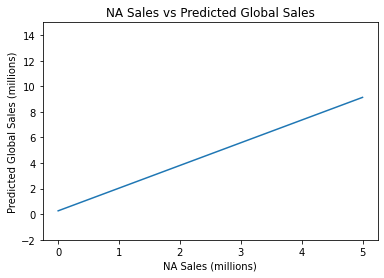

In [46]:
#creating linear regression model for NA data
model = LinearRegression()
model.fit(list(map(lambda x: [x], na_grouped_data.index.tolist())), na_grouped_data['Global_Sales'].tolist())
xs = np.linspace(0.0,5.0, 101)
plt.plot(xs, model.predict(list(map(lambda x: [x],xs))))
plt.ylim(-2, 15)
plt.xlabel("NA Sales (millions)")
plt.ylabel("Predicted Global Sales (millions)")
plt.title("NA Sales vs Predicted Global Sales")
print("LINEAR REGRESSION SLOPE:", model.coef_[0])
print("LINEAR REGRESSION YINT:", model.intercept_)

LINEAR REGRESSION SLOPE: 2.8127114665004997
LINEAR REGRESSION YINT: 0.12297493704615459


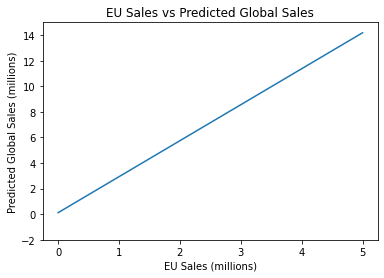

In [45]:
#creating linear regression model for EU data
model = LinearRegression()
model.fit(list(map(lambda x: [x], eu_grouped_data.index.tolist())), eu_grouped_data['Global_Sales'].tolist())
xs = np.linspace(0.0,5.0, 101)
plt.plot(xs, model.predict(list(map(lambda x: [x],xs))))
plt.ylim(-2, 15)
plt.xlabel("EU Sales (millions)")
plt.ylabel("Predicted Global Sales (millions)")
plt.title("EU Sales vs Predicted Global Sales")
print("LINEAR REGRESSION SLOPE:", model.coef_[0])
print("LINEAR REGRESSION YINT:", model.intercept_)

LINEAR REGRESSION SLOPE: 3.6350237489779906
LINEAR REGRESSION YINT: -0.8585113409168761


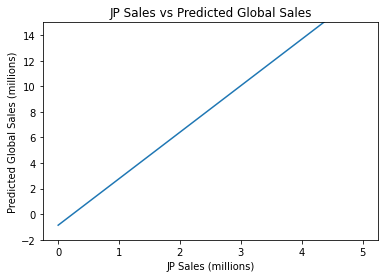

In [44]:
#creating linear regression model for JP data
model = LinearRegression()
model.fit(list(map(lambda x: [x], jp_grouped_data.index.tolist())), jp_grouped_data['Global_Sales'].tolist())
xs = np.linspace(0.0,5.0, 101)
plt.plot(xs, model.predict(list(map(lambda x: [x],xs))))
plt.ylim(-2, 15)
plt.xlabel("JP Sales (millions)")
plt.ylabel("Predicted Global Sales (millions)")
plt.title("JP Sales vs Predicted Global Sales")
print("LINEAR REGRESSION SLOPE:", model.coef_[0])
print("LINEAR REGRESSION YINT:", model.intercept_)